# 6	Hypothesentest


## 6.1	Statistische Prozesskontrolle



a) Zur Überwachung des Mittelwertes wird die standardnormalverteilte Größe 


$z = \frac{{\bar x - \mu }}{{\frac{\sigma }{{\sqrt N }}}} = \sqrt N  \cdot \frac{{\bar x - \mu }}{\sigma }$


verwendet. Die Hypothesen sind

H0:	Mittelwert ist richtig µ = 3


H1:	Mittelwert weicht ab µ $\ne$ 3


b) Für ein Signifikanzniveau von $\alpha$ = 5 % ergeben sich mit 

${c_1} = {F^{ - 1}}\left( {\frac{\alpha }{2}} \right) =  - 1.9600$

und  


${c_2} = {F^{ - 1}}\left( {1 - \frac{\alpha }{2}} \right) = 1.9600$


die Eingriffsgrenzen


${\rm{2}}{\rm{.5617}} = {\mu _{C1}} = \mu  + \frac{{{c_1} \cdot \sigma }}{{\sqrt N }} < \bar x \le \mu  + \frac{{{c_2} \cdot \sigma }}{{\sqrt N }} = {\mu _{C2}} = {\rm{3}}{\rm{.4383}}$


In [1]:
""" Bibliotheken importieren"""
from scipy.stats import norm   # normal-Verteilung
from scipy.stats import t     # t-Verteitung
from scipy.stats import chi2  # Chi-Quadrat-Verteilung 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  


''' Definition der Funktion '''
alpha = 0.05
N = 5
M = 10
mu = 3
sig = 0.5
x = np.random.normal(mu,sig/np.sqrt(N),M)
OEG = mu + norm.ppf(1-alpha/2,0,1)*sig/np.sqrt(N)
UEG = mu + norm.ppf(alpha/2,0,1)*sig/np.sqrt(N)
OEG,UEG

(3.4382612702882906, 2.561738729711709)

c) Die Gütefunktion gibt die Wahrscheinlichkeit für eine richtige Verwerfung der Nullhypo-these als Funktion der wirklichen Abweichung ${\Delta \mu}$  an. Sie ergibt sich aus der Gleichung

$1 - \beta \left( {\Delta \mu } \right) = \int\limits_{ - \infty }^{UEG} {f\left( x \right)\,dx}  + 1 - \int\limits_{ - \infty }^{OEG} {f\left( x \right)\,dx} $


Dabei ist f(x) eine Normalverteilung mit dem oben berechneten Mittelwert µ + ${\Delta \mu}$ und der Standardabweichung σ/√N


Es ergibt sich die blaue Kurve in dem folgenden Diagramm:

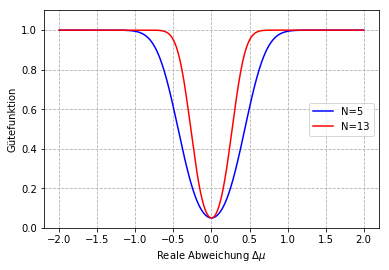

In [2]:
'''Berechnung der Gütefunktion'''
dmu = np.arange(-2,2.001,0.001)
G = norm.cdf(UEG,mu + dmu,sig/np.sqrt(N)) + 1 - norm.cdf(OEG,mu + dmu,sig/np.sqrt(N))


'''Grafikdarstellung der Gütefunktion'''
plt.plot(dmu,G, color='b') #für N=5
plt.grid(True, which= 'both', axis='both', linestyle='--')
plt.xlabel('Reale Abweichung ${\Delta\mu}$')
plt.ylabel('Gütefunktion')
plt.ylim(top=1.1, bottom=0)


''' Berechnung des ersten Wertes, der eine Wahrscheinlichkeit <= 0.95 besitzt'''
bin = np.where(G<=0.95)
Dmu = np.abs(dmu[bin[0][0]])

n = 0
while Dmu > 0.5:
    n = n + 1
    OEG = mu + norm.ppf(1-alpha/2,0,1)*sig/np.sqrt(n)
    UEG = mu + norm.ppf(alpha/2,0,1)*sig/np.sqrt(n)
    G = norm.cdf(UEG,mu + dmu,sig/np.sqrt(n)) + 1 - norm.cdf(OEG,mu + dmu,sig/np.sqrt(n))
    bin = np.where(G<=0.95)
    Dmu = np.abs(dmu[bin[0][0]])
    
plt.plot(dmu,G, color='r') #für N=13
plt.legend(['N=5','N=13'], loc=7)

d) Nach dem Diagramm wird eine Abweichung von${\Delta\mu}$= 0.5 wird mit einer Wahrscheinlich-keit von 60.88 % erkannt.

e) Erhöhung des Stichprobenumfangs führt zu einer Verringerung der Varianz. Dadurch än-dern sich Eingriffsgrenzen und Gütefunktion. Der Stichprobenumfang wird solange erhöht, bis die geforderte Aussagesicherheit erreicht wird.



##### Die entsprechende Gütefunktion ist in dem Diagramm  oben bereits eingezeichnet.



f) Es ergeben sich die Eingriffsgrenzen UEG = 2.7282 und OEG = 3.2718.



In [4]:
''' Eingriffsgrenzen '''
OEG = mu + norm.ppf(1-alpha/2,0,1)*sig/np.sqrt(n)
UEG = mu + norm.ppf(alpha/2,0,1)*sig/np.sqrt(n)
OEG, UEG

(3.2717981017046873, 2.7282018982953122)